<a href="https://colab.research.google.com/github/WhiteTeaDragon/SingularValues/blob/main/TT/compress_first_TT_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-determinism

  Created wheel for tensorflow-determinism: filename=tensorflow_determinism-0.3.0-cp37-none-any.whl size=9158 sha256=a8182f0d01351ca7784562b6b184547f4ed9be01d0df6ee7e5f9057e655d3c05
  Stored in directory: /root/.cache/pip/wheels/66/c3/18/13959a90d3e0d10182a99866d6ff4d0119e9daed6ce014b54c
Successfully built tensorflow-determinism


In [ ]:
import pickle
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [ ]:
import functions

In [ ]:
import importlib
importlib.reload(functions)

<module 'functions' from '/content/functions.py'>

In [ ]:
os.environ['TF_DETERMINISTIC_OPS'] = '1'
SEED = 123
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

Время на обучение у разных моделей может отличаться -- это происходит из-за того, что они обучались в разных сессиях Google Colab.

In [ ]:
def plot_final_graph(addition="", third=True, ylim_loss=4, ylim_error=1):
    history_no_clipping = pickle.load(open(addition + 'trainHistoryDict', "rb"))
    history_05 = pickle.load(open(addition + 'trainHistoryDict_clip_05', "rb"))
    if third:
        history_1 = pickle.load(open(addition + 'trainHistoryDict_clip_1', "rb"))
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    axs[0].grid(True)
    axs[1].grid(True)
    max_len = len(history_no_clipping['val_loss'])
    axs[0].plot(history_no_clipping['val_loss'][4:max_len:5], label='no clipping')
    axs[0].plot(history_05['val_loss'][4:max_len:5], label='0.5')
    if third:
        axs[0].plot(history_1['val_loss'][4:max_len:5], label='1')
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylim(0, ylim_loss)
    axs[1].plot(1 - np.array(history_no_clipping['val_acc'][4:max_len:5]), label='no clipping')
    axs[1].plot(1 - np.array(history_05['val_acc'][4:max_len:5]), label='0.5')
    if third:
        axs[1].plot(1 - np.array(history_1['val_acc'][4:max_len:5]), label='1')
    axs[1].set_title('Error')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylim(0, ylim_error)
    axs[0].legend(loc='best')
    axs[1].legend(loc='best')

### Loading Data

In [ ]:
num_classes = 10

# load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# input image dimensions.
input_shape = x_train.shape[1:]

# normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# if subtract pixel mean is enabled
x_train_mean = np.mean(x_train, axis=0)
x_train -= x_train_mean
x_test -= x_train_mean

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# convert class vectors to binary class matrices.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)


### Without decomposition & compress_first = False

#### Model without clipping

In [ ]:
model, model_type = functions.define_and_compile_ResNet_model(input_shape)
model.summary()

Learning rate:  0.001
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           batch_normalization[0][0]        
________________________________________________________________________

In [ ]:
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'simple_trainHistoryDict', steps_per_epoch=100,
                       batch_size=100, epochs=1000)

Выходные данные были обрезаны до нескольких последних строк (5000).
Epoch 1/1000
Learning rate:  0.001
100/100 [==============================] - 41s 83ms/step - loss: 2.7917 - acc: 0.2219 - val_loss: 2.3573 - val_acc: 0.2291

Epoch 00001: val_acc improved from -inf to 0.22910, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5
Epoch 2/1000
Learning rate:  0.001
100/100 [==============================] - 7s 73ms/step - loss: 1.8881 - acc: 0.3917 - val_loss: 2.0455 - val_acc: 0.3656

Epoch 00002: val_acc improved from 0.22910 to 0.36560, saving model to /content/saved_models/cifar10_ResNet32v1_model.002.h5
Epoch 3/1000
Learning rate:  0.001
100/100 [==============================] - 7s 72ms/step - loss: 1.7052 - acc: 0.4599 - val_loss: 2.1614 - val_acc: 0.3371

Epoch 00003: val_acc did not improve from 0.36560
Epoch 4/1000
Learning rate:  0.001
100/100 [==============================] - 7s 72ms/step - loss: 1.6138 - acc: 0.5131 - val_loss: 1.8819 - val_acc: 0.4220

Ep

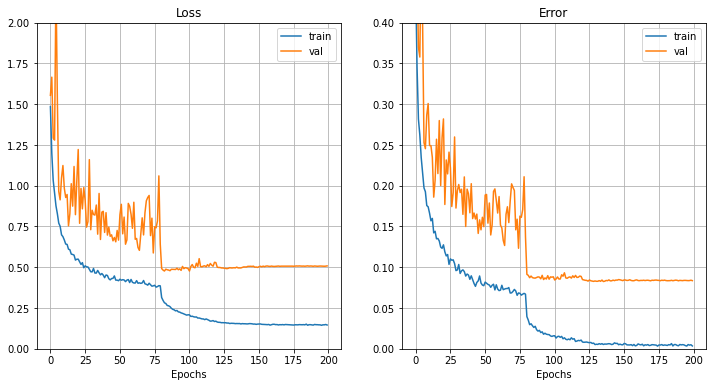

In [ ]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('simple_trainHistoryDict', "rb"))
functions.plot_loss_acc(history, 2, 0.4)

In [ ]:
history['val_acc'][-1]

0.9164000153541565

In [ ]:
1 - history['val_acc'][-1]

0.0835999846458435

#### Model with clipping to 0.5

In [ ]:
model, model_type = functions.define_and_compile_ResNet_model(input_shape)

Learning rate:  0.001


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
callbacks = functions.standard_callbacks(model_type) + [functions.Clipping(0.5, "simple", False)]
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'simple_trainHistoryDict_clip_05', steps_per_epoch=100, epochs=650,
                       batch_size=100,
                       callbacks=callbacks)

Using real-time data augmentation.
Epoch 1/650
Learning rate:  0.001
100/100 [==============================] - 43s 86ms/step - loss: 2.2006 - acc: 0.3265 - val_loss: 2.3642 - val_acc: 0.2484

Epoch 00001: val_acc improved from -inf to 0.24840, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/650
Learning rate:  0.001
100/100 [==============================] - 8s 77ms/step - loss: 1.7926 - acc: 0.3541 - val_loss: 3.6236 - val_acc: 0.1000

Epoch 00002: val_acc did not improve from 0.24840
Epoch 3/650
Learning rate:  0.001
100/100 [==============================] - 8s 76ms/step - loss: 1.5951 - acc: 0.4249 - val_loss: 3.5198 - val_acc: 0.1021

Epoch 00003: val_acc did not improve from 0.24840
Epoch 4/650
Learning rate:  0.001
100/100 [==============================] - 8s 75ms/step - loss: 1.4126 - acc: 0.4980 - val_loss: 1.9510 - val_acc: 0.3602

Epoch 00004: val_acc improved from 0.24840 to 0.36020, saving model to /content/saved_models/cifar10_ResNet32v1_model.004.h5
Epoch 5/650
Learning rate:  0.001
100/100 [==============================] - 8s 77ms/step - loss: 1.3215 - acc: 0.5336 - val_loss: 4.6725 - val_acc: 0.2246

Epoch 00005: val_acc did not improve from 0.36020
Epoch 6/650
Learning rate:  0.001
100/100 [==============================] - 8s 76ms/step - loss:

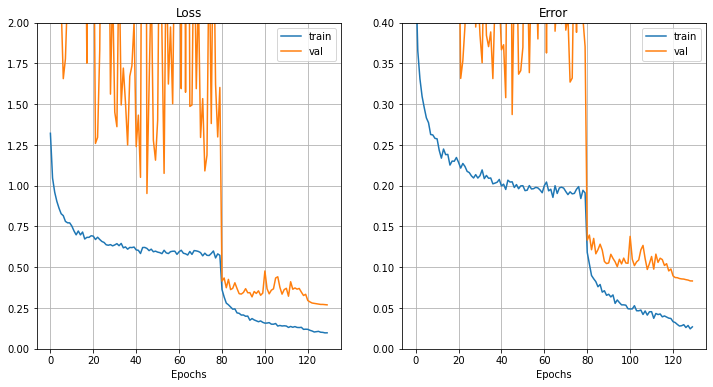

In [ ]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('simple_trainHistoryDict_clip_05', "rb"))
functions.plot_loss_acc(history, 2, 0.4)

In [ ]:
history['val_acc'][-1]

0.9168000221252441

In [ ]:
1 - history['val_acc'][-1]

0.08319997787475586

#### Model with clippting to 1

In [ ]:
model, model_type = functions.define_and_compile_ResNet_model(input_shape)

Learning rate:  0.001


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
callbacks = functions.standard_callbacks(model_type) + [functions.Clipping(1, "simple", False)]
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'simple_trainHistoryDict_clip_1', steps_per_epoch=100, epochs=650,
                       batch_size=100,
                       callbacks=callbacks)

Using real-time data augmentation.
Epoch 1/650
Learning rate:  0.001
100/100 [==============================] - 44s 89ms/step - loss: 2.1915 - acc: 0.3245 - val_loss: 3.1123 - val_acc: 0.1626

Epoch 00001: val_acc improved from -inf to 0.16260, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/650
Learning rate:  0.001
100/100 [==============================] - 8s 80ms/step - loss: 1.7038 - acc: 0.3971 - val_loss: 3.9554 - val_acc: 0.1021

Epoch 00002: val_acc did not improve from 0.16260
Epoch 3/650
Learning rate:  0.001
100/100 [==============================] - 8s 80ms/step - loss: 1.4968 - acc: 0.4774 - val_loss: 2.9984 - val_acc: 0.1460

Epoch 00003: val_acc did not improve from 0.16260
Epoch 4/650
Learning rate:  0.001
100/100 [==============================] - 8s 81ms/step - loss: 1.3743 - acc: 0.5235 - val_loss: 1.5800 - val_acc: 0.4531

Epoch 00004: val_acc improved from 0.16260 to 0.45310, saving model to /content/saved_models/cifar10_ResNet32v1_model.004.h5
Epoch 5/650
Learning rate:  0.001
100/100 [==============================] - 8s 80ms/step - loss: 1.2835 - acc: 0.5663 - val_loss: 2.7744 - val_acc: 0.3587

Epoch 00005: val_acc did not improve from 0.45310
Epoch 6/650
Learning rate:  0.001
100/100 [==============================] - 8s 80ms/step - loss:

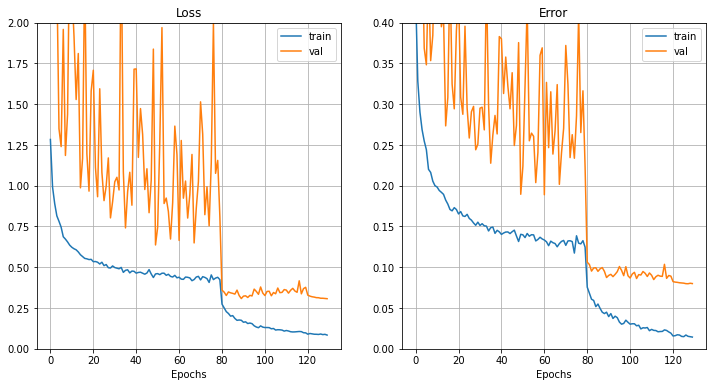

In [ ]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('simple_trainHistoryDict_clip_1', "rb"))
functions.plot_loss_acc(history, 2, 0.4)

In [ ]:
history['val_acc'][-1]

0.9200000166893005

In [ ]:
1 - history['val_acc'][-1]

0.07999998331069946

#### Plotting final graph

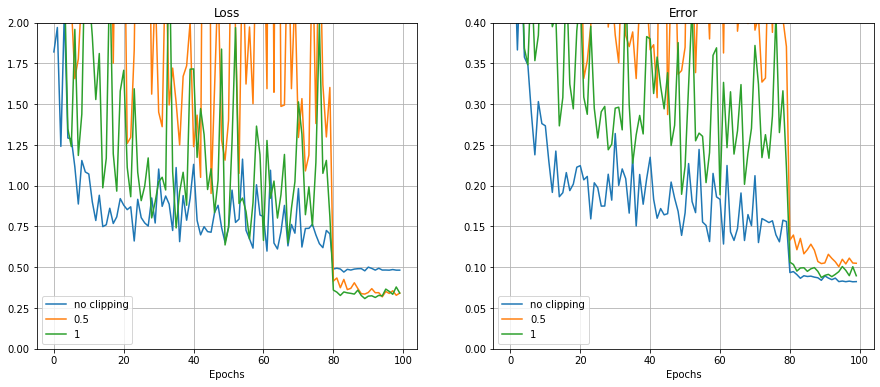

In [7]:
plot_final_graph("simple2_", ylim_loss=2, ylim_error=0.4)

### decomposition_rank = 29 & compress_first = False

#### Model without clipping

In [ ]:
model, model_type = functions.define_and_compile_ResNet_model(
    input_shape, conv_layer = functions.ConvDecomposed2D, compress_first=False,
    decomposition_rank=29)
model.summary()

Learning rate:  0.001
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 16)   448         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_155 (BatchN (None, 32, 32, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation_155 (Activation)     (None, 32, 32, 16)   0           batch_normalization_155[0][0]    
______________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'trainHistoryDict', steps_per_epoch=100, batch_size=100,
                       epochs=650)

Using real-time data augmentation.
Epoch 1/650
Learning rate:  0.001
100/100 [==============================] - 49s 104ms/step - loss: 2.8575 - acc: 0.2660 - val_loss: 6.4128 - val_acc: 0.1269

Epoch 00001: val_acc improved from -inf to 0.12690, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/650
Learning rate:  0.001
100/100 [==============================] - 9s 90ms/step - loss: 2.2402 - acc: 0.3735 - val_loss: 2.8754 - val_acc: 0.2428

Epoch 00002: val_acc improved from 0.12690 to 0.24280, saving model to /content/saved_models/cifar10_ResNet32v1_model.002.h5
Epoch 3/650
Learning rate:  0.001
100/100 [==============================] - 9s 88ms/step - loss: 2.1265 - acc: 0.4138 - val_loss: 2.9761 - val_acc: 0.2504

Epoch 00003: val_acc improved from 0.24280 to 0.25040, saving model to /content/saved_models/cifar10_ResNet32v1_model.003.h5
Epoch 4/650
Learning rate:  0.001
100/100 [==============================] - 9s 89ms/step - loss: 2.0292 - acc: 0.4528 - val_loss: 2.8335 - val_acc: 0.3470

Epoch 00004: val_acc improved from 0.25040 to 0.34700, saving model to /content/saved_models/cifar10_ResNet32v1_model.004.h5
Epoch 5/650
Learning rate:  0.001
100/100 [==============================] - 9s 89ms/step - loss: 1.9298 - acc: 0.4939 - val_loss: 2.0659 - val_acc: 0.493

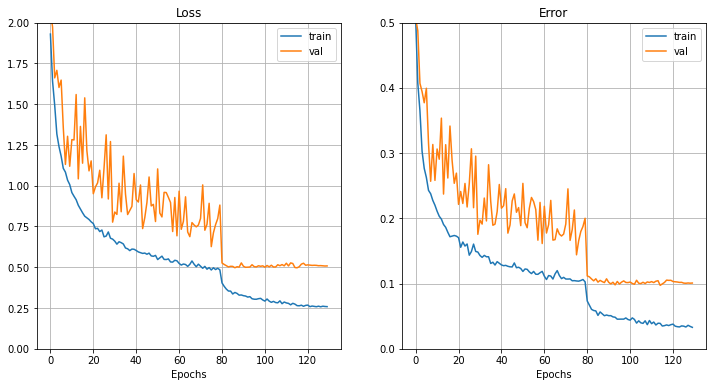

In [ ]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('trainHistoryDict', "rb"))
functions.plot_loss_acc(history, 2, 0.5)

In [ ]:
history['val_acc'][-1]

0.8992000222206116

In [ ]:
1 - history['val_acc'][-1]

0.10079997777938843

#### Model with clipping to 0.5

In [ ]:
model, model_type = functions.define_and_compile_ResNet_model(
    input_shape, conv_layer = functions.ConvDecomposed2D, decomposition_rank=29,
    compress_first=False)

Learning rate:  0.001


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
callbacks = functions.standard_callbacks(model_type) + [functions.Clipping(0.5)]
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'trainHistoryDict_clip_05', steps_per_epoch=100, epochs=650,
                       batch_size=100,
                       callbacks=callbacks)

Using real-time data augmentation.
Epoch 1/650
Learning rate:  0.001
100/100 [==============================] - 48s 105ms/step - loss: 3.4640 - acc: 0.2533 - val_loss: 3.0169 - val_acc: 0.1819

Epoch 00001: val_acc improved from -inf to 0.18190, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/650
Learning rate:  0.001
100/100 [==============================] - 9s 92ms/step - loss: 2.0375 - acc: 0.2965 - val_loss: 2.6853 - val_acc: 0.1000

Epoch 00002: val_acc did not improve from 0.18190
Epoch 3/650
Learning rate:  0.001
100/100 [==============================] - 9s 93ms/step - loss: 1.8297 - acc: 0.3810 - val_loss: 2.7341 - val_acc: 0.1001

Epoch 00003: val_acc did not improve from 0.18190
Epoch 4/650
Learning rate:  0.001
100/100 [==============================] - 9s 92ms/step - loss: 1.6917 - acc: 0.4348 - val_loss: 3.0174 - val_acc: 0.1007

Epoch 00004: val_acc did not improve from 0.18190
Epoch 5/650
Learning rate:  0.001
100/100 [==============================] - 9s 89ms/step - loss: 1.6161 - acc: 0.4656 - val_loss: 3.2814 - val_acc: 0.1294

Epoch 00005: val_acc did not improve from 0.18190
Epoch 6/650
Learning rate:  0.001
100/100 [==============================] - 9s 93ms/step - loss: 1.5009 - acc: 0.5193 - val_loss: 2.2613 - val_acc: 0.2352

Epoch 00006: va

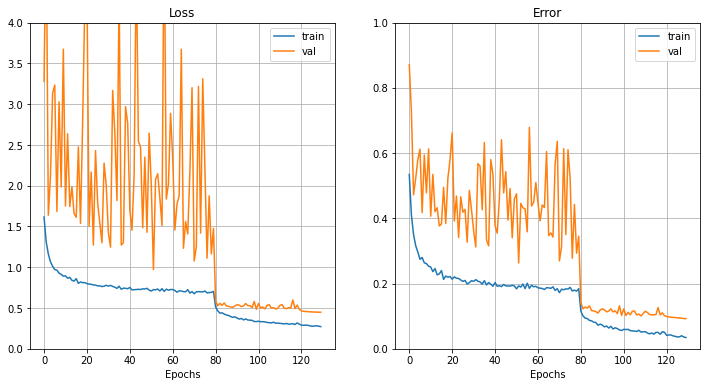

In [ ]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('trainHistoryDict_clip_05', "rb"))
functions.plot_loss_acc(history, 4, 1)

In [ ]:
history['val_acc'][-1]

0.9072999954223633

In [ ]:
1 - history['val_acc'][-1]

0.09270000457763672

#### Model with clipping to 1

In [ ]:
model, model_type = functions.define_and_compile_ResNet_model(
    input_shape, conv_layer = functions.ConvDecomposed2D, compress_first=False,
    decomposition_rank=29)

Learning rate:  0.001


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
callbacks = functions.standard_callbacks(model_type) + [functions.Clipping(1)]
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'trainHistoryDict_clip_1', steps_per_epoch=100, epochs=650,
                       batch_size=100,
                       callbacks=callbacks)

Using real-time data augmentation.
Epoch 1/650
Learning rate:  0.001
100/100 [==============================] - 18s 108ms/step - loss: 2.8597 - acc: 0.2691 - val_loss: 8.0512 - val_acc: 0.1447

Epoch 00001: val_acc improved from -inf to 0.14470, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/650
Learning rate:  0.001
100/100 [==============================] - 9s 91ms/step - loss: 1.9682 - acc: 0.3476 - val_loss: 2.6323 - val_acc: 0.1000

Epoch 00002: val_acc did not improve from 0.14470
Epoch 3/650
Learning rate:  0.001
100/100 [==============================] - 9s 90ms/step - loss: 1.6698 - acc: 0.4691 - val_loss: 2.6775 - val_acc: 0.1006

Epoch 00003: val_acc did not improve from 0.14470
Epoch 4/650
Learning rate:  0.001
100/100 [==============================] - 9s 92ms/step - loss: 1.5753 - acc: 0.5044 - val_loss: 2.6387 - val_acc: 0.2061

Epoch 00004: val_acc improved from 0.14470 to 0.20610, saving model to /content/saved_models/cifar10_ResNet32v1_model.004.h5
Epoch 5/650
Learning rate:  0.001
100/100 [==============================] - 9s 90ms/step - loss: 1.4894 - acc: 0.5322 - val_loss: 1.8399 - val_acc: 0.4087

Epoch 00005: val_acc improved from 0.20610 to 0.40870, saving model to /content/saved_models/cifar10_ResNet32v1_model.005.h5
Epoch 6/650
Learning r

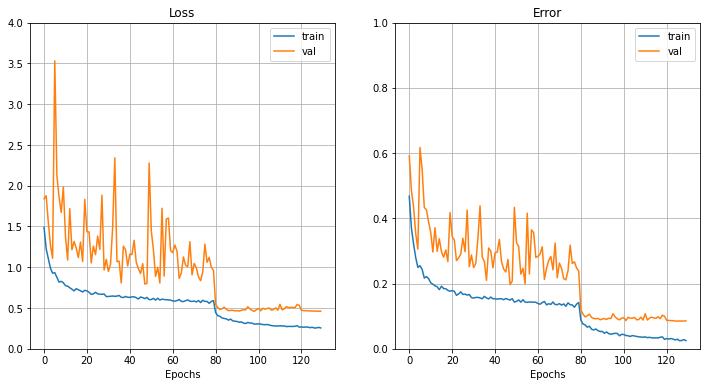

In [ ]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('trainHistoryDict_clip_1', "rb"))
functions.plot_loss_acc(history, 4, 1)

In [ ]:
history['val_acc'][-1]

0.9146000146865845

In [ ]:
1 - history['val_acc'][-1]

0.08539998531341553

#### Plotting final graph

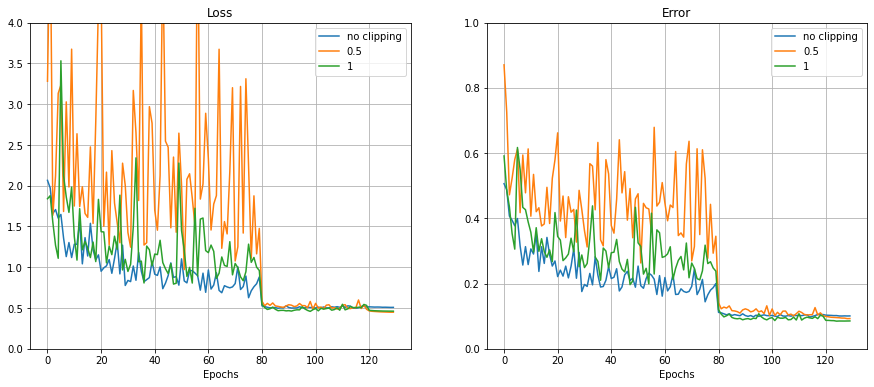

In [8]:
plot_final_graph("compress_first_29_")

### decomposition_rank=29 & compress_first = True

#### Model without clipping

In [ ]:
model, model_type = functions.define_and_compile_ResNet_model(
    input_shape, conv_layer = functions.ConvDecomposed2D, decomposition_rank=29)
model.summary()

Learning rate:  0.001
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv_decomposed2d (ConvDecompos (None, 32, 32, 16)   713         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 16)   64          conv_decomposed2d[0][0]          
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           batch_normalization[0][0]        
________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'trainHistoryDict', steps_per_epoch=100, batch_size=100,
                       epochs=650)

Using real-time data augmentation.
Epoch 1/650
Learning rate:  0.001
100/100 [==============================] - 51s 134ms/step - loss: 2.7297 - acc: 0.2848 - val_loss: 8.9219 - val_acc: 0.1304

Epoch 00001: val_acc improved from -inf to 0.13040, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/650
Learning rate:  0.001
100/100 [==============================] - 9s 94ms/step - loss: 2.2016 - acc: 0.3899 - val_loss: 2.3514 - val_acc: 0.3609

Epoch 00002: val_acc improved from 0.13040 to 0.36090, saving model to /content/saved_models/cifar10_ResNet32v1_model.002.h5
Epoch 3/650
Learning rate:  0.001
100/100 [==============================] - 9s 92ms/step - loss: 2.0882 - acc: 0.4309 - val_loss: 3.3242 - val_acc: 0.2164

Epoch 00003: val_acc did not improve from 0.36090
Epoch 4/650
Learning rate:  0.001
100/100 [==============================] - 9s 93ms/step - loss: 2.0334 - acc: 0.4542 - val_loss: 2.7590 - val_acc: 0.3059

Epoch 00004: val_acc did not improve from 0.36090
Epoch 5/650
Learning rate:  0.001
100/100 [==============================] - 9s 93ms/step - loss: 1.9354 - acc: 0.4921 - val_loss: 2.1093 - val_acc: 0.4325

Epoch 00005: val_acc improved from 0.36090 to 0.43250, saving model to /content/saved_models/cifar10_ResNet32v1_model.005.h5
Epoch 6/650
Learning r

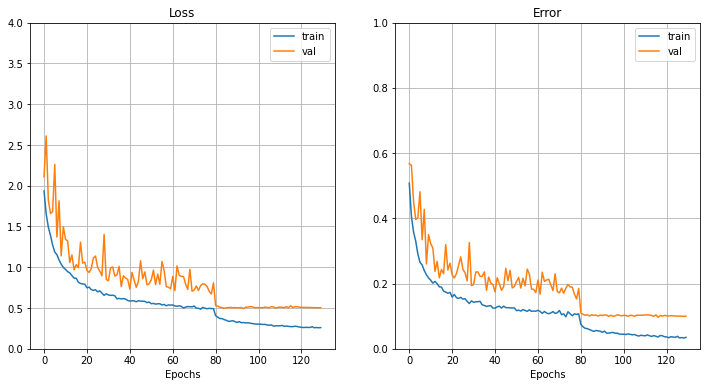

In [ ]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('trainHistoryDict', "rb"))
functions.plot_loss_acc(history, 4, 1)

In [ ]:
history['val_acc'][-1]

0.9000999927520752

In [ ]:
1 - history['val_acc'][-1]

0.0999000072479248

#### Model with clipping to 0.5

In [ ]:
model, model_type = functions.define_and_compile_ResNet_model(
    input_shape, conv_layer = functions.ConvDecomposed2D, decomposition_rank=29)

Learning rate:  0.001


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
callbacks = functions.standard_callbacks(model_type) + [functions.Clipping(0.5)]
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'trainHistoryDict_clip_05', steps_per_epoch=100, epochs=650,
                       batch_size=100,
                       callbacks=callbacks)

Using real-time data augmentation.
Epoch 1/650
Learning rate:  0.001
100/100 [==============================] - 48s 106ms/step - loss: 2.7845 - acc: 0.2686 - val_loss: 13.4940 - val_acc: 0.1220

Epoch 00001: val_acc improved from -inf to 0.12200, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/650
Learning rate:  0.001
100/100 [==============================] - 9s 90ms/step - loss: 2.0428 - acc: 0.2900 - val_loss: 2.7684 - val_acc: 0.1000

Epoch 00002: val_acc did not improve from 0.12200
Epoch 3/650
Learning rate:  0.001
100/100 [==============================] - 9s 90ms/step - loss: 1.8819 - acc: 0.3529 - val_loss: 2.9100 - val_acc: 0.1000

Epoch 00003: val_acc did not improve from 0.12200
Epoch 4/650
Learning rate:  0.001
100/100 [==============================] - 9s 94ms/step - loss: 1.7744 - acc: 0.4004 - val_loss: 3.1598 - val_acc: 0.1000

Epoch 00004: val_acc did not improve from 0.12200
Epoch 5/650
Learning rate:  0.001
100/100 [==============================] - 9s 91ms/step - loss: 1.6537 - acc: 0.4555 - val_loss: 3.4897 - val_acc: 0.1201

Epoch 00005: val_acc did not improve from 0.12200
Epoch 6/650
Learning rate:  0.001
100/100 [==============================] - 9s 91ms/step - loss: 1.5422 - acc: 0.4967 - val_loss: 2.7842 - val_acc: 0.1945

Epoch 00006: va

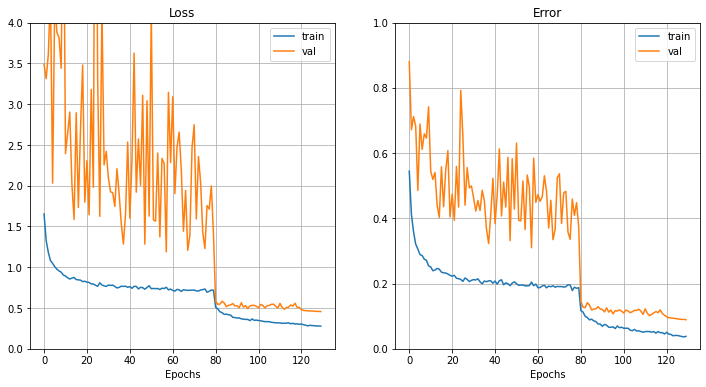

In [ ]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('trainHistoryDict_clip_05', "rb"))
functions.plot_loss_acc(history, 4, 1)

In [ ]:
history['val_acc'][-1]

0.9108999967575073

In [ ]:
1 - history['val_acc'][-1]

0.08910000324249268

#### Model with clipping to 1

In [ ]:
model, model_type = functions.define_and_compile_ResNet_model(
    input_shape, conv_layer = functions.ConvDecomposed2D, decomposition_rank=29)

Learning rate:  0.001


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
callbacks = functions.standard_callbacks(model_type) + [functions.Clipping(1)]
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'trainHistoryDict_clip_1', steps_per_epoch=100, epochs=650,
                       batch_size=100,
                       callbacks=callbacks)

Using real-time data augmentation.
Epoch 1/650
Learning rate:  0.001
100/100 [==============================] - 18s 108ms/step - loss: 2.5880 - acc: 0.2920 - val_loss: 3.4721 - val_acc: 0.1739

Epoch 00001: val_acc improved from -inf to 0.17390, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/650
Learning rate:  0.001
100/100 [==============================] - 9s 93ms/step - loss: 1.9442 - acc: 0.3508 - val_loss: 3.0492 - val_acc: 0.1000

Epoch 00002: val_acc did not improve from 0.17390
Epoch 3/650
Learning rate:  0.001
100/100 [==============================] - 9s 92ms/step - loss: 1.7350 - acc: 0.4354 - val_loss: 3.2060 - val_acc: 0.1000

Epoch 00003: val_acc did not improve from 0.17390
Epoch 4/650
Learning rate:  0.001
100/100 [==============================] - 9s 93ms/step - loss: 1.6028 - acc: 0.4902 - val_loss: 3.1807 - val_acc: 0.1308

Epoch 00004: val_acc did not improve from 0.17390
Epoch 5/650
Learning rate:  0.001
100/100 [==============================] - 9s 93ms/step - loss: 1.5080 - acc: 0.5206 - val_loss: 2.8558 - val_acc: 0.1944

Epoch 00005: val_acc improved from 0.17390 to 0.19440, saving model to /content/saved_models/cifar10_ResNet32v1_model.005.h5
Epoch 6/650
Learning rate:  0.001
100/100 [==============================] - 9s 91ms/step - loss:

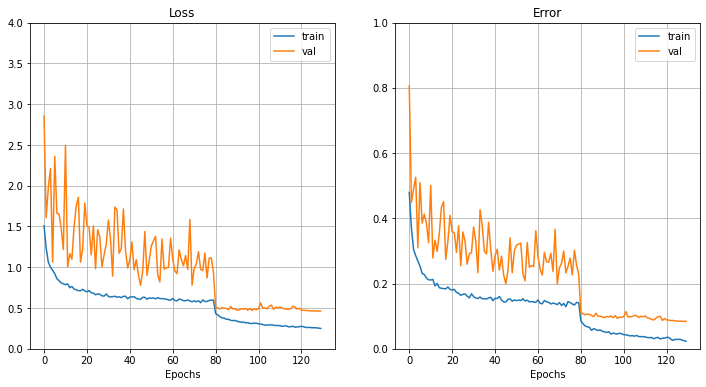

In [ ]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('trainHistoryDict_clip_1', "rb"))
functions.plot_loss_acc(history, 4, 1)

In [ ]:
history['val_acc'][-1]

0.9160000085830688

In [ ]:
1 - history['val_acc'][-1]

0.08399999141693115

#### Plotting final graph

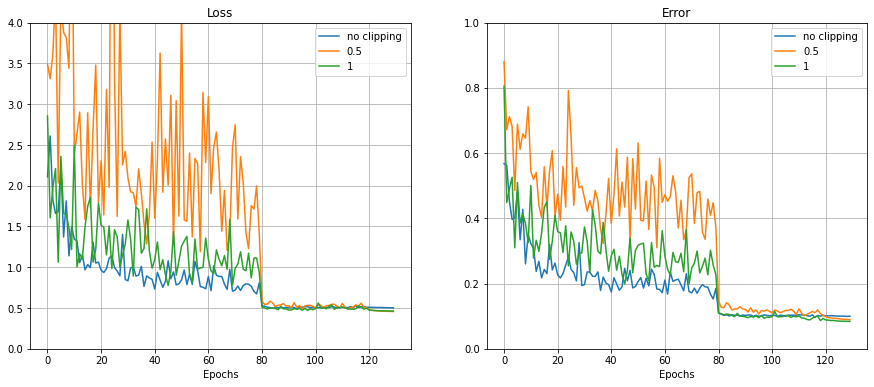

In [9]:
plot_final_graph("R_29_")